<center><h1>Discovering Color Distribution of Azerbaijani Carpets</h1> </center>


# Exploring Azerbaijani Carpets

<div class="alert alert-block alert-success">
 "Where my carpet is, there is my house" is an Azerbaijani proverb showing the importance of carpets in the lives of Azerbaijanis.  
</div>

Throughout centuries, Azerbaijanis have practiced and mastered the art of carpet weaving from the capital city to rural mountainous areas of Azerbaijan. Carpet weaving in Azerbaijan dates back to the Bronze Age and is a part of UNESCO's Representative List of Intangible Cultural Heritage ("Ancient Artistry" 2022). Carpeting is no longer a family business and has become capitalized, so the tradition is no longer passed down to generations as previously. But the stories told by the carpet patterns and associated with carpets in our daily lives still live on. 

When looking at Azerbaijani carpets, we immediately notice the richness of patterns and colors. Based on the prior research, the carpets are described as if they absorbed all the colours of nature of Azerbaijan:
- the ruby brightness of pomegranate grains,
- the golden shining of quinces, 
- the copper colours of saffron, 
- the amber and the lilac tints of grapes (Azadi, Kerimov and Zollinger, 2001). 



Hence, in this project, I will explore the distribution of colors among different regions of Azerbaijan. 

Each region of Azerbaijan is famous for its original carpets and carpet-ware being quite peculiar to each place. So, for many centuries various carpet weaving schools were formed in Azerbaijan. They got their names from regions and became known as Guba, Baku, Shirvan, Ganja, Gazakh, Garabagh, Nakhichevan and Tabriz schools. Today, only 7 of those schools are a part of modern-day Azerbaijan borders. Hence, we will consider only those 7 regions:
- Guba, 
- Baku, 
- Shirvan, 
- Ganja, 
- Gazakh, 
- Garabagh, 
- Nakhichevan. 





## Exploratory question

After gathering, exploring and cleaning our carpet data, we're going to answer the following questions:

<center><h2> 1. What are the dominant colors used in carpet creation in each region of Azerbaijan based on the image processing of dataset for each region?</h2></center>
    
<center><h3>2. Do the extracted dominant colors match the previous research descriptions identified in the Azerbaijani-Caucasian Rugs by Werner Azadi, Latif Kerimov and Zollinger?</h3></center>

## Methods used

#### For data gathering:

For this project, I used various Python libraries and custom-written functions to scrape a given URL looking for images and gifs. I have also manually removed images which were discoloured and damaged. Lastly, I have created a dataset consisting of the carpet image name and the region name it belongs to.

#### For data analysis:
I have used OpenCV2 for image manipulation, applied KMeans, a machine learning algorithm, to identify and extract the major colours and then plotted the information using the Altair library of Python.




In general, I am using GitHub as a public repository to follow the process of creating my overall capstone project where all of my data gatherings, cleaning and experiments will live. Here is the link to the repository: https://github.com/hamidliii/capstone-azerbaijani-carpets

## Dataset

### Scrapping Bing

Despite my efforts to find the ready dataset, I didn't find anything ready. Hence, I moved on to gathering the data myself. The first approach I used to collect data was based on the availability heuristic. As the wide net is filled with images and I used this script for my previous projects, I decided to use the Bing image downloader script, a custom-built library to quickly scrap available photos in the Bing browser. To gather as much data as possible, I will use various variations of "Azerbaijani carpets" terms and ensure we do not have duplicates. After the first batch of the gathered images, I manually checked each shot to ensure there were no copies and removed irrelevant photos. 





The script will be using following variables:
1. **query_string**: String to be searched.
2. **limit**: (optional, default is 100) Number of images to download.
3. **output_dir**: (optional, default is 'dataset') Name of output dir.
4. **adult_filter_off**: (optional, default is True) Enable of disable adult filteration.
5. **force_replace**: (optional, default is False) Delete folder if present and start a fresh download.
6. **timeout**: (optional, default is 60) timeout for connection in seconds.
7. **filter**: (optional, default is "") filter, choose from [line, photo, clipart, gif, transparent]
8. **verbose**: (optional, default is True) Enable downloaded message.


For the initial run, I will limit image lookup to 100 to see how much original data can be gathered.

In [2]:
# importing needed libraries 

from glob import glob 
from PIL import Image

In [4]:
from bing_image_downloader import downloader

downloader.download('azerbaijani carpets', limit=100,  
                    output_dir='azerbaijani_carpets', adult_filter_off=True, 
                    force_replace=False, timeout=60, filter="photo", verbose=True)




After the first batch of the gathered images, I manually checked each shot to ensure no duplicates and removed irrelevant photos, as shown below. Out of 100 downloaded images, many of them are irrelevant. Hence, I will be removing them manually from the dataset. Some photos from the Faig Ahmed collection are not helpful for my purposes as they are not traditional and can distort the later process. Hence, I will be removing them too.



For the purposes of keeping this notebook clean without unnecessary *failed* background work, I won't include the whole process here. However, you can check the whole process documented in this [GitHub repository folder](https://github.com/hamidliii/capstone-azerbaijani-carpets/tree/main/Data_Gathering_Bing_Scrapping) (the notebook and pdf file in case notebook is not loading).

### Reflection on scrapping the Bing method

As we saw, scrapping based on keywords is a tedious and lengthy process:

1) The number of images gathered in 3-4 trials of this method is less than 200 images

2) The images gathered a not labelled based on region, so I can't classify the pictures without further manual work of identifying each image (I could also opt to use classifying models, but even for them, I would need to label and train the model which would still require at least 50-60 image labelling to get suboptimal model accuracy)

3) With this method, we assume all images available through search engines have permission to be gathered/manipulated/analyzed. To verify our assumption, we would need to manually verify each link collected for copyrights certification, adding time to our manual work and making the automated web-scrapping quite useless.

Hence, I need to look for a better way how I can gather carpet images not to breach IP laws and gather a large labelled dataset. 

### Finding a website with Azerbaijani carpets

My previous search has shown that there is no publicly available carpet database. The next step was to email the museum of carpets in my country and ask for access to their digital archive. However, my request hasn't been answered even after multiple emails over the summer. So, I started to look for any public library I could find. After a bit of research, I have found a [azerbaijanirugs.com website](http://www.azerbaijanrugs.com/guide/index.htm) hosting more than 10000 Azerbaijani and broader Caucasus/Persian region carpets categorized by carpet school and region. While I used a ready library for the previous weeb-scrapping, I decided to write a custom function to scrap a specified website here. I used this [course](https://www.codecademy.com/learn/learn-web-scraping?g_network=g&g_device=c&g_adid=525668108565&g_keyword=python%20beautifulsoup%20tutorial&g_acctid=243-039-7011&g_adtype=search&g_campaign=US+Language%3A+Pro+-+Exact&g_keywordid=kwd-652592749664&g_campaignid=10030170700&g_adgroupid=102526217178&utm_id=t_kwd-652592749664:ag_102526217178:cp_10030170700:n_g:d_c&utm_term=python%20beautifulsoup%20tutorial&utm_campaign=US%20Language%3A%20Pro%20-%20Exact&utm_source=google&utm_medium=paid-search&utm_content=525668108565&hsa_acc=2430397011&hsa_cam=10030170700&hsa_grp=102526217178&hsa_ad=525668108565&hsa_src=g&hsa_tgt=kwd-652592749664&hsa_kw=python%20beautifulsoup%20tutorial&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gclid=CjwKCAiAsYyRBhACEiwAkJFKouWNbtp0vrc8JBBEOSbqk29pzqfIB4TRgxO7VyHfHXVrFXY9M-yT2xoCFQMQAvD_BwE) to learn basics of how to scrap website and put together the functions. 

With this approach, I can get 5000+ original high-quality carpet images for the seven identified regions by categorically scrapping this website. Additionally, this website has a section talking about [CONDITIONS OF USE](http://www.azerbaijanrugs.com/conditions_of_use.htm):



<div class="alert alert-block alert-danger">
 "If you would like to use any information (whether in part or full), we request that you cite and provide a link to our website. Advance authorization is necessary."
</div>

Hence, I will explicitly cite this website as my dataset source. However, they also mention that advanced authorization is required, which is quite vague as they do not specify in which context advance authorization is required and where we can send inquiries about this. On the Contact Us page, I found an email I used to inquire about the website's image usage. I have specified that I will be using images only from the educational side of the website rather than the commercial side. 
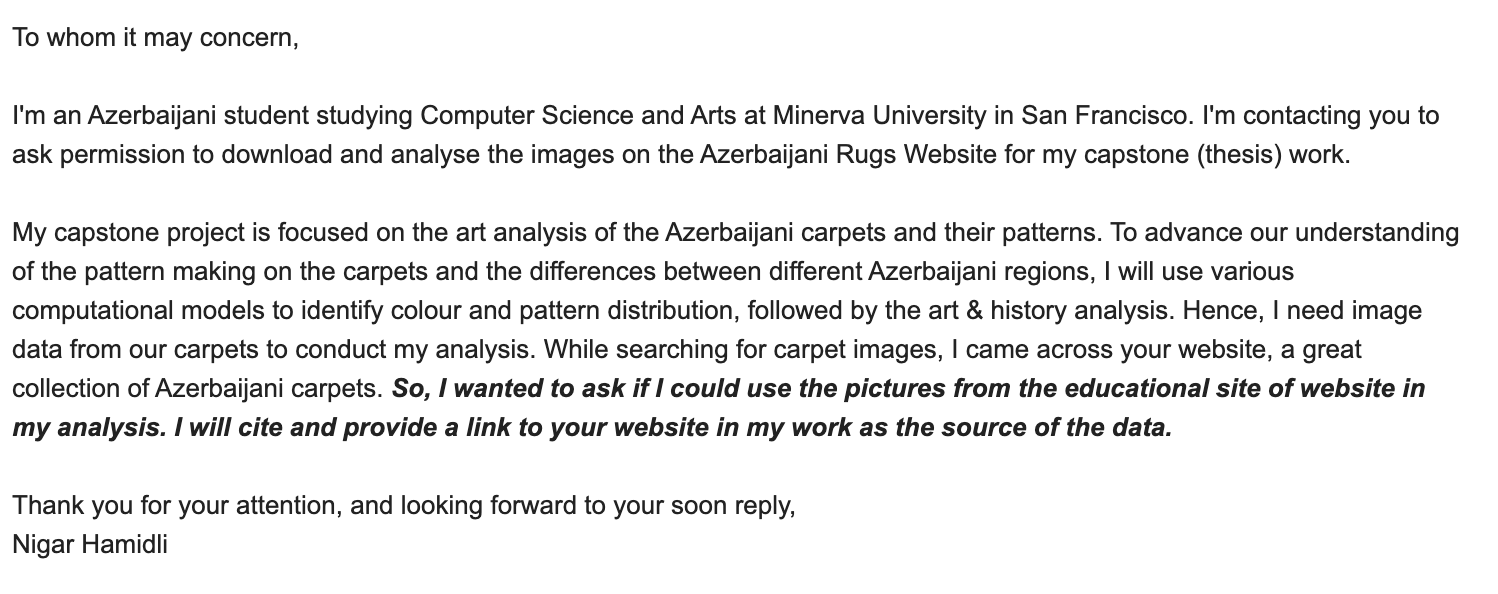
*Email asking permission to use images from [azerbaijanirugs.com website](http://www.azerbaijanrugs.com/guide/index.htm).*

Unfortunately, again, my email was left without a reply. Upon further investigation of the website, I have noticed that copyrights for the [educational part of the website](http://www.azerbaijanrugs.com/educational-guide-to-oriental-rugs.htm) are dated @ 2004-2018. 


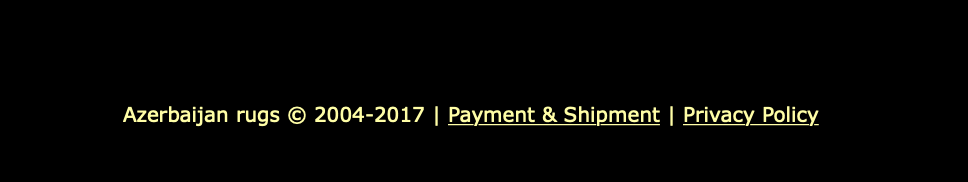
*A thumbnail on the website showing its copyright dates.*

Going further in the website to the section I want to scrap, the copyright dates are 2004-2014. 
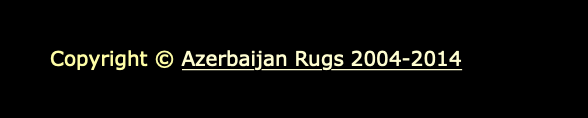
*A thumbnail on the website showing its copyright dates.*

Based on copyright law, the material becomes public domain once the copyright license expires. It is available for anyone to use and copy without permission or payment ("What is the "public domain" and can I copy works from the public domain freely?", 2022). Hence, I do not technically need permission to use those images. However, from ethics of care point of view, even though legally I'm permitted to use any information from the website as their copyright has expired, it would not be respectful to do so without any acknowledgement of the website owners as they have spent years gathering and classifying Azerbaijani carpet images. Hence, I will cite their website as my data source and exactly what I have obtained from there. 



### Scrapping Azerbaijani Rugs website

For the purposes of this project, I have scrapped data from each of the seven regions from azerbaijanirugs.com. However, I have skipped over the sections containing non-tradional carpet images such as small bags with carpet material pattern, horse saddles, etc. 

As mentioned above, here I used custom function to crawl over the given url and gather any images/gifs. 

In [5]:
#importing the necessary libraries
import requests
import os
from tqdm import tqdm
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin, urlparse

/Users/nina/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [6]:
def is_valid(url):
    """
        Checks if a given URL is valid.
    """
    parsed_url = urlparse(url)
    return bool(parsed_url.netloc) and bool(parsed_url.scheme)

In [7]:
# A core function that grabs all image URLs of a webpage

def grab_images(url):
    """
        Finds and gives back all image URLs on a given webpage
    """
    
    soup = bs(requests.get(url).content, "html.parser")
    
    urls = []
    
    # extract all img tags in HTML
    for img in tqdm(soup.find_all("img"), "Extracting images"):
        img_url = img.attrs.get("src")
        if not img_url:
            # if img does not contain src attribute => skip
            continue
        # make the URL absolute by joining domain with the URL that is just extracted
        img_url = urljoin(url, img_url)
        
        # remove HTTP GET key-value pairs
        try:
            pos = img_url.index("?")
            img_url = img_url[:pos]
        except ValueError:
            pass
        
        # check if the url is valid
        if is_valid(img_url):
            urls.append(img_url)
    return urls

In [8]:
def download(url, pathname):
    """
        Downloads a image given a URL and puts it in the selected folder  
    """
    # if path does not exist, make that path a new directory
    if not os.path.isdir(pathname):
        os.makedirs(pathname)
    # piece by piece download the body of response
    response = requests.get(url, stream=True)
    # get the total file size
    file_size = int(response.headers.get("Content-Length", 0))
    # get the file name
    filename = os.path.join(pathname, url.split("/")[-1])
    # progress bar
    progress = tqdm(response.iter_content(1024), f"Downloading {filename}", total=file_size, unit="B", unit_scale=True, unit_divisor=1024)
    with open(filename, "wb") as f:
        for data in progress.iterable:
            # write data read to the file
            f.write(data)
            # update the progress bar manually
            progress.update(len(data))
            

In [9]:
def main(url, path):
    # get all images
    imgs = grab_images(url)
    for img in imgs:
        # for each image, download it
        download(img, path)

### Example of data gathering through url crawling

I am scrapping the Educational part of the websites. Specifically, the part with HISTORICAL CAUCASIAN/AZERBAIJANI AND IRANIAN RUGS. This section is then divided into regions, out of which I am scrapping the above-selected seven. Each region is subsequently divided into cities/specific patterns. Hence, I have scrapped each region and their subsequent divisions. In this notebook, I will show an example of scrapping on one of the cities within Guba/Kuba region. I also counted how many images we gathered for each region and the overall count of images. The same workflow is applied to every other region. You can look up the whole process [here](https://github.com/hamidliii/capstone-azerbaijani-carpets/tree/main/Data_Gathering_azerbaijanirugs.com). 

In [8]:
for i in range(121):
    main(f"http://www.azerbaijanrugs.com/guide/kuba/kuba-seychour/antique_caucasian_kuba_seychour_rug{i}.htm", "kuba-syechour-carpets")
    

Extracting images: 0it [00:00, ?it/s]
Extracting images: 100%|██████████| 2/2 [00:00<00:00, 9300.01it/s]


In [11]:
from matplotlib import pyplot as plt
# Checking the number of images loaded  
# Placeholder for images
images_loaded = []
for img_path in glob('kuba-syechour-carpets/*'):
    images_loaded.append(plt.imread(img_path, 0))
    
    
carpet_images_loaded = 0 
carpet_images_loaded += len(images_loaded)
print("The number of loaded images is:", len(images_loaded))
print("The total number of all loaded images is:", carpet_images_loaded)

The number of loaded images is: 147
The total number of all loaded images is: 147


### Manual Data Cleaning

During the data gathering of the images, I decided to manually exclude pictures which were in black/white colouring, severely damaged, blurry and contained other objects or subjects in the photos as they would add noise to the data and could distort the models, which will be applied onto them. 

# All the data
I have saved all the images in local azerbaijani_carpets folder, which is furthr dvided into region folder which are divided into pattern/city folders. 

In [12]:
# showing thee folders under azerbaijani_carpets
for i in os.listdir('./azerbaijani_carpets'):
    if i != '.DS_Store':
        print(i)

Shirvan
Ganja
azerbaijani carpets
Baku
Nakhchivan
Guba
Karabagh
Qazax


# Creating the image / region dataset


To simplify the data manipulation, I will create a dataset of all image names and their corresponding region. I am dividing them by main regions as I want to find predominant colors of each region.

In [17]:
# Importing the necessary libraries

import os
import pandas as pd

# a placeholder to add all image names and associated folder name  
data = []

carpetdir = 'azerbaijani_carpets/'

for root, dirc, files in os.walk(carpetdir):
    for file in files:
        if ".jpg" in file:
            data.append((os.path.join(file), root.split('/')[-1]))

carpets_df = pd.DataFrame(data, columns = ['File_Name','Carpet_Region'])


In [18]:
carpets_df.head()

,File_Name,Carpet_Region
0,antique-shirvan-pictorial-rug11b-Romanoff.jpg,Shirvan
1,antique_shirvan_kilim130_caucasian.jpg,Shirvan
2,antique_shirvan_star_rug16c.jpg,Shirvan
3,antique_shirvan_marasali_boteh_prayer_rug14.jpg,Shirvan
4,antique_shirvan_kilim70_caucasian.jpg,Shirvan


## Number of images in each region's folder.


In [19]:
carpets_df.groupby('Carpet_Region').count()

,File_Name
Carpet_Region,
Baku,54
Ganja,62
Guba,2310
Karabagh,351
Nakhchivan,34
Qazax,1007
Shirvan,885


## Basic statistics about our dataset

In [20]:
carpets_df.groupby('Carpet_Region').count().describe()


,File_Name
count,7.000000
mean,671.857143
std,827.118175
min,34.000000
25%,58.000000
50%,351.000000
75%,946.000000
max,2310.000000


As we can see, our regional image data distribution is very unbalanced with smallest region by image count having 34 images, while biggest has 2316 images. 

## Data Sampling

Based on the experiments I run on different sampling sizes, we can see that the color distributions vary based on the sampling size. As our regions have a great difference in the number of images, one of the suggested methods would be to use 10%  of images of each region. However, our smallest region has only 34 images. So, its sample size would be 3 images while the most significant region's sample size would be 232 images. So, the biggest region would have a more diverse pool of images to determine the most prevalent colors. For the full process of deciding between sample size and image color extraction experimentations, check out this [repo](https://github.com/hamidliii/capstone-azerbaijani-carpets/tree/main/Dominant_color_extraction).

Data sampling saves computational power when the dataset is too big to run in one run. 
However, in this case, the overall pool of images is small enough not to sample the images. This way, we will trade off a little computing time for more accurate colour distribution between regions. Hence, I will use each region's complete set of images to determine the dominant features.



In [21]:
def sample_data(info, sample_size=50, groupby='Carpet_Region'):
    '''
        Sampling procedure
    ''' 
    def sample_func(x):
        # sample 10% of while dataset if smaple size is set to < 1
        if sample_size < 1: 
            subsample_size = round(0.1*len(x))
        else:
            # sample each region by given sample size or the size of full set 
            subsample_size = len(x) if len(x) < sample_size else sample_size
        return list(x.sample(subsample_size, random_state=1))
    
    sample = info.groupby(groupby).agg({
        'File_Name': sample_func
    }).to_dict()
    
    return sample['File_Name']

In [43]:
# Picking different sampling sizes to experiment  
# Sample size is set to the biggets region size in our dataset
sample_carpets_all = sample_data(carpets_df, sample_size=2310, groupby='Carpet_Region')


# Detect 10 prevalent colors in samples & create visualization data

For writing my code to extract the dominant colours and visualize them, I advised this [tutorial](https://www.kaggle.com/code/d22ski/the-painting-art-colors-timeline) and adjusted it to my dataset. 

I have used OpenCV2 for image manipulation, applied KMeans, a machine learning algorithm, to identify and extract the primary colors and then plotted the information using the Altair library of Python. I picked KMeans algorithms because it is the simplest yet most comprehensive way to deal with colors. As we can't extract a specific color as each pixel would represent a different color, we use an algorithm to cluster pixels based on their distance in 3D space defined by their R, G, B color components. Hence, I will cluster pixels into 10 groups representing the 10 most dominant colors. 

Overall, I follow the steps: 

- Grouped the dataset by regions;
- Within every region, images were resized to a fixed dimension and combined into a single image as an array of pixel's RGB components;
- K-Means clustering (k=10) was applied over this array, producing clusters of the 10 most prevalent colors; 
- For each color cluster the pixels arranged to this cluster (color) were counted, giving the size of each cluster;
- The resulting clustering information (colors and size of color clusters for each region) was used to create the final visualization of the colors distribution in each region.

In [23]:
# importing all necessary libraries
import numpy as np
import pandas as pd
from zipfile import ZipFile
import re
import cv2
from sklearn.cluster import KMeans, MiniBatchKMeans
from math import sqrt
from collections import Counter

In [24]:
import glob
from PIL import Image

# Load and resize images
def load_img(filename):
    for file in glob.glob('azerbaijani_carpets/**/*.jpg'): 
        if filename == file.split('/')[-1]:
            image = cv2.imread(file)
            try:
                img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            except cv2.error as e:
                print('Failed to load:', filename)
                return None
    return img

def resize_img(img):
    h, w, _ = img.shape
    w_new = int(200 * w / max(w, h))
    h_new = int(200 * h / max(w, h))
    
    return cv2.resize(img, (w_new, h_new), interpolation = cv2.INTER_AREA)

In [25]:
# COLORS CONVERSION
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

def rgb_to_hsp(rgb):
    """
    Calculates RGB color brightness
    """
    return sqrt(0.299 * (rgb[0]**2) + 0.587 * (rgb[1]**2) + 0.114 * (rgb[2]**2))

In [26]:
# PREVALENT COLORS DETECTION WITH K-Means
def detect_prevalent_colors(files, group_label, colors_num):
    """
    Detect N-most prevalent colors in the list of given image files
    
    Params:
    files: list of filenames
    group_label: label of group as tuple of variable and string
    colors_num: N most prevalent colors to detect 
    """
    data = []
    for f in files:
        img = load_img(f)
        if img is not None:
            mod_img = resize_img(img)
            mod_img = mod_img.reshape(mod_img.shape[0] * mod_img.shape[1], 3).astype('float32')
            data.append(mod_img)
        
    data = np.concatenate(data, axis=0)
    
    clustering_method = MiniBatchKMeans # KMeans or MiniBatchKMeans
    
    clf = clustering_method(n_clusters = colors_num)
    labels = clf.fit_predict(data)
    cluster_centers = clf.cluster_centers_
    
    counts = Counter(labels)
    counts_sum = sum(counts.values())
    
    colors_data = [
        {
            'hex': rgb_to_hex( cluster_centers[i]),
            'hsp': rgb_to_hsp(cluster_centers[i]),
            'prop': (counts[i] / counts_sum),
            group_label[0]: group_label[1]
        } for i in counts.keys()
    ]
    
    return colors_data

###  Sample size is all images in the given region



In [27]:
# RUN
viz_colors_all = []
for region, files in sample_carpets_all.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=10)
    
    # Sort colors by brightness
    viz_colors_all.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


# Prepare & Plot colors timelines visualization

In [28]:
viz_df_all = pd.DataFrame(viz_colors_all)
viz_df_all.head(15)

,hex,hsp,prop,region
0,#040303,4.012658,0.119825,Baku
1,#372e31,49.807629,0.105947,Baku
2,#66392e,73.099529,0.126661,Baku
3,#745a4e,97.743025,0.168463,Baku
4,#a13e2d,101.350690,0.099501,Baku
5,#947965,128.129166,0.118901,Baku
6,#b57744,136.914648,0.096883,Baku
7,#bb9a77,161.763019,0.095916,Baku
8,#d4c09f,195.424014,0.051998,Baku
9,#f6f2e6,242.075905,0.015905,Baku


# Visualize with color proportions


In [29]:
import altair as alt

alt.Chart(viz_df_all, title='Prevalent colors in carpets by region').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)

Based on the following descriptions of the colours used in the Azerbaijani carpets:

- the ruby brightness of pomegranate grains,
- the golden shining of quinces, 
- the copper colours of saffron, 
- the amber and the lilac tints of grapes (Azadi, Kerimov and Zollinger, 2001). 

My dominant colour extraction mostly matches. The only missing colour is lilac which could be either because lilac is mainly used for countering or it is not as prevalent as other colours. Another critical moment here is that many images in our dataset have a full black background, which could bias our results. Based on the results, we have a consistent distribution of the darkest shade across all regions. However, the carpets don't have a black colour or a lighter shade for countering.

I have also run the same model for the top 20 colours to see if we can see more shades. With 20 colours, we see more blue shades appearing, indicating that we could reach lilac with more colour extraction. We also see that the darkest shade is closer to full black colour, hex = 000000. So, with even more shades, we could fully extract the background colour and remove it to see a more accurate distribution of colours. But since we wanted to know the dominant colours, I will stop at the top 20. In further projects, we will dive into understanding if the colours of each region correspond to the natural sources available in them and if we could classify Azerbaijani carpet images only based on their colour composition. 

# The color "gamut" of Azerbaijani carpets

In [36]:
# RUN
viz_colors_all_20_clusters = []
for region, files in sample_carpets_all.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=20)
    
    # Sort colors by brightness
    viz_colors_all_20_clusters.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


In [45]:
viz_df_all_20_clusters = pd.DataFrame(viz_colors_all_20_clusters)
viz_df_all_20_clusters.head(15)

,hex,hsp,prop,region
0,#020202,2.134192,0.109323,Baku
1,#292022,35.980388,0.055811,Baku
2,#592b22,60.460750,0.051782,Baku
3,#413d40,63.099142,0.058452,Baku
4,#704334,82.400620,0.074168,Baku
5,#90291e,85.640094,0.036322,Baku
6,#5f524d,85.908624,0.053411,Baku
7,#63666a,102.330984,0.026395,Baku
8,#974c37,103.463813,0.055567,Baku
9,#805e4a,104.125253,0.079608,Baku


In [46]:
import altair as alt

alt.Chart(viz_df_all_20_clusters, title='Prevalent colors in carpets by region').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)

## References

- An Educational Guide to Antique Caucasian Azerbaijani rugs and carpets. (2022). Retrieved from http://www.azerbaijanrugs.com/guide/index.htm

- "Ancient Artistry". 2022. Undp.Shorthandstories.Com. Retrieved from https://undp.shorthandstories.com/ancient-artistry/.

- Azadi, S., Kerimov, L. and Zollinger, W., 2001. Azerbaijani-Caucasian rugs. Hamburg: The Ulmke Collection.

- GitHub - hamidliii/capstone-azerbaijani-carpets: This repository serves as documentation history of my capstone journey and exploration of Azerbaijani carpets. (2022). Retrieved from https://github.com/hamidliii/capstone-azerbaijani-carpets

- Learn Web Scraping with Beautiful Soup | Codecademy. (2022). Retrieved from https://www.codecademy.com/learn/learn-web-scraping?g_network=g&g_device=c&g_adid=525668108565&g_keyword=python%20beautifulsoup%20tutorial&g_acctid=243-039-7011&g_adtype=search&g_campaign=US+Language%3A+Pro+-+Exact&g_keywordid=kwd-652592749664&g_campaignid=10030170700&g_adgroupid=102526217178&utm_id=t_kwd-652592749664:ag_102526217178:cp_10030170700:n_g:d_c&utm_term=python%20beautifulsoup%20tutorial&utm_campaign=US%20Language%3A%20Pro%20-%20Exact&utm_source=google&utm_medium=paid-search&utm_content=525668108565&hsa_acc=2430397011&hsa_cam=10030170700&hsa_grp=102526217178&hsa_ad=525668108565&hsa_src=g&hsa_tgt=kwd-652592749664&hsa_kw=python%20beautifulsoup%20tutorial&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gclid=CjwKCAiAsYyRBhACEiwAkJFKouWNbtp0vrc8JBBEOSbqk29pzqfIB4TRgxO7VyHfHXVrFXY9M-yT2xoCFQMQAvD_BwE

- The painting art colors timeline. (2022). Retrieved from https://www.kaggle.com/code/d22ski/the-painting-art-colors-timeline

- "Traditional Azerbaijani Carpet Weaving Art - Google Arts & Culture". 2022. Google Arts & Culture. Retrieved from https://artsandculture.google.com/story/traditional-azerbaijani-carpet-weaving-art-heydar-aliyev-center/XQXBfww0vbLpKQ?hl=en.






